## Create a colorbar with matplotlib

Reference: https://matplotlib.org/tutorials/colors/colorbar_only.html

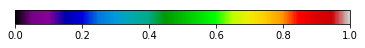

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
fig.set_figheight(.25)
col_map = plt.get_cmap('nipy_spectral')
cb = mpl.colorbar.ColorbarBase(ax, cmap=col_map, orientation='horizontal')
plt.savefig("colorbar4.png")
cb;

## Load GeoJSON data

In [10]:
from ipyleaflet import GeoJSON
import json

with open("geojson-layer.json") as fp:
    geojson_data = json.load(fp)
    
geojson_layer = GeoJSON(data=geojson_data)

## Create legend including the colorbar

In [11]:
from ipyleaflet_htmllegend import HtmlLegend
from ipywidgets import widget_serialization

layer_id = widget_serialization['to_json'](geojson_layer, None)

html_legend = HtmlLegend(config={
    "legends": [{
        "name": 'Legend',
        "layer": layer_id,
        "elements": [{
            "html": '<img src="colorbar.png">'
        }]
    }]
})

## Create map and add legend

In [12]:
from ipyleaflet import Map
from ipywidgets import Layout
leafet_map = Map(center=(52.576, 19.006), zoom=7, layout=Layout(height='450px'))
leafet_map.add_layer(geojson_layer)
leafet_map.add_control(html_legend)
leafet_map

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [5]:
leafet_map.remove_layer(leafet_map.layers[0])